## Stroke Dataset

### Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

### Loading Stroke Dataset

In [2]:
# Load stroke dataset
df = pd.read_csv('stroke.csv')    
x = df.drop(columns=['stroke', 'id']) 
y = df['stroke']

# Identify categorical columns and apply label encoding
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoder = LabelEncoder()
for column in categorical_columns:
    x[column] = label_encoder.fit_transform(x[column])

### Data Preparation

In [3]:
# Fill null values in the original dataset
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

D1 = pd.DataFrame(x_imputed, index=x.index, columns=x.columns)

# Declare scaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Scale imputed data
x_minmax_scaled = minmax_scaler.fit_transform(x_imputed)
x_standard_scaled = standard_scaler.fit_transform(x_imputed)
D2 = pd.DataFrame(x_minmax_scaled, index=x.index, columns=x.columns)
D3 = pd.DataFrame(x_standard_scaled, index = x.index, columns=x.columns)

# Train and test (original dataset)
x_train, x_test, y_train, y_test = train_test_split(D1, y, test_size = 0.2, random_state=0)

# Train and test (minmax scaled dataset)
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(D2, y, test_size=0.2, random_state=0)

# Train and test (standard scaled dataset)
x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(D3, y, test_size=0.2, random_state=0)

feature_names = x.columns.tolist()

### D1 (Original)

In [4]:
knn_d1 = KNeighborsClassifier()
knn_d1.fit(x_train, y_train)
knn_d1_predictions = knn_d1.predict(x_test)

dt_d1 = DecisionTreeClassifier()
dt_d1.fit(x_train, y_train)
dt_d1_predictions = dt_d1.predict(x_test)

# Evaluating KNN Model
knn_accuracy_d1 = knn_d1.score(x_test, y_test)
knn_matrix_d1 = confusion_matrix(y_test, knn_d1_predictions)
print("k-Nearest Neighbors (k-NN) Results:")
print("Accuracy:", knn_accuracy_d1)
print("Confusion Matrix:\n", knn_matrix_d1)
print("\n")

# Evaluating DT Model
dt_accuracy_d1 = dt_d1.score(x_test, y_test)
dt_matrix_d1 = confusion_matrix(y_test, dt_d1_predictions)
print("Decision Tree Results:")
print("Accuracy:", dt_accuracy_d1)
print("Confusion Matrix:\n", dt_matrix_d1)
print("\n")

# Visualize the tree as text
tree_text_d1 = export_text(dt_d1, feature_names=feature_names)
print(tree_text_d1)

k-Nearest Neighbors (k-NN) Results:
Accuracy: 0.9422700587084148
Confusion Matrix:
 [[962   6]
 [ 53   1]]


Decision Tree Results:
Accuracy: 0.9187866927592955
Confusion Matrix:
 [[933  35]
 [ 48   6]]


|--- age <= 67.50
|   |--- age <= 49.50
|   |   |--- age <= 37.50
|   |   |   |--- smoking_status <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- smoking_status >  2.50
|   |   |   |   |--- avg_glucose_level <= 76.23
|   |   |   |   |   |--- avg_glucose_level <= 75.81
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_glucose_level >  75.81
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  76.23
|   |   |   |   |   |--- class: 0
|   |   |--- age >  37.50
|   |   |   |--- age <= 39.50
|   |   |   |   |--- work_type <= 2.50
|   |   |   |   |   |--- bmi <= 28.35
|   |   |   |   |   |   |--- bmi <= 28.05
|   |   |   |   |   |   |   |--- avg_glucose_level <= 83.38
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= 81.53
|   |   | 

### D2 (MinMax Scaling)

In [5]:
knn_d2 = KNeighborsClassifier()
knn_d2.fit(x_train_minmax, y_train)
knn_d2_predictions = knn_d2.predict(x_test_minmax)

dt_d2 = DecisionTreeClassifier()
dt_d2.fit(x_train_minmax, y_train)
dt_d2_predictions = dt_d2.predict(x_test_minmax)

# Evaluating KNN Model
knn_accuracy_d2 = knn_d2.score(x_test_minmax, y_test)
knn_matrix_d2 = confusion_matrix(y_test, knn_d2_predictions)
print("k-Nearest Neighbors (k-NN) Results:")
print("Accuracy:", knn_accuracy_d2)
print("Confusion Matrix:\n", knn_matrix_d2)
print("\n")

# Evaluating DT Model
dt_accuracy_d2 = dt_d2.score(x_test_minmax, y_test)
dt_matrix_d2 = confusion_matrix(y_test, dt_d2_predictions)
print("Decision Tree Results:")
print("Accuracy:", dt_accuracy_d2)
print("Confusion Matrix:\n", dt_matrix_d2)
print("\n")

# Visualize the tree as text
tree_text_d2 = export_text(dt_d2, feature_names=feature_names)
print(tree_text_d2)

k-Nearest Neighbors (k-NN) Results:
Accuracy: 0.9461839530332681
Confusion Matrix:
 [[966   2]
 [ 53   1]]


Decision Tree Results:
Accuracy: 0.9129158512720157
Confusion Matrix:
 [[927  41]
 [ 48   6]]


|--- age <= 0.82
|   |--- age <= 0.60
|   |   |--- age <= 0.46
|   |   |   |--- smoking_status <= 0.83
|   |   |   |   |--- class: 0
|   |   |   |--- smoking_status >  0.83
|   |   |   |   |--- avg_glucose_level <= 0.10
|   |   |   |   |   |--- avg_glucose_level <= 0.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_glucose_level >  0.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  0.10
|   |   |   |   |   |--- class: 0
|   |   |--- age >  0.46
|   |   |   |--- age <= 0.48
|   |   |   |   |--- work_type <= 0.62
|   |   |   |   |   |--- bmi <= 0.21
|   |   |   |   |   |   |--- bmi <= 0.20
|   |   |   |   |   |   |   |--- avg_glucose_level <= 0.13
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= 0.12
|   |   |   |   |   |  

### D3 (Standard Scaling)

In [6]:
knn_d3 = KNeighborsClassifier()
knn_d3.fit(x_train_standard, y_train)
knn_d3_predictions = knn_d3.predict(x_test_standard)

dt_d3 = DecisionTreeClassifier()
dt_d3.fit(x_train_standard, y_train)
dt_d3_predictions = dt_d3.predict(x_test_standard)

# Evaluating KNN Model
knn_accuracy_d3 = knn_d3.score(x_test_standard, y_test)
knn_matrix_d3 = confusion_matrix(y_test, knn_d3_predictions)
print("k-Nearest Neighbors (k-NN) Results:")
print("Accuracy:", knn_accuracy_d3)
print("Confusion Matrix:\n", knn_matrix_d3)
print("\n")

# Evaluating DT Model
dt_accuracy_d3 = dt_d3.score(x_test_standard, y_test)
dt_matrix_d3 = confusion_matrix(y_test, dt_d3_predictions)
print("Decision Tree Results:")
print("Accuracy:", dt_accuracy_d3)
print("Confusion Matrix:\n", dt_matrix_d3)
print("\n")

# Visualize the tree as text
tree_text_d3 = export_text(dt_d3, feature_names=feature_names)
print(tree_text_d3)

k-Nearest Neighbors (k-NN) Results:
Accuracy: 0.9471624266144814
Confusion Matrix:
 [[967   1]
 [ 53   1]]


Decision Tree Results:
Accuracy: 0.9178082191780822
Confusion Matrix:
 [[932  36]
 [ 48   6]]


|--- age <= 1.07
|   |--- age <= 0.28
|   |   |--- age <= -0.25
|   |   |   |--- smoking_status <= 1.05
|   |   |   |   |--- class: 0
|   |   |   |--- smoking_status >  1.05
|   |   |   |   |--- avg_glucose_level <= -0.66
|   |   |   |   |   |--- avg_glucose_level <= -0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_glucose_level >  -0.67
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  -0.66
|   |   |   |   |   |--- class: 0
|   |   |--- age >  -0.25
|   |   |   |--- age <= -0.16
|   |   |   |   |--- work_type <= 0.30
|   |   |   |   |   |--- bmi <= -0.07
|   |   |   |   |   |   |--- bmi <= -0.11
|   |   |   |   |   |   |   |--- avg_glucose_level <= -0.50
|   |   |   |   |   |   |   |   |--- avg_glucose_level <= -0.54
|   |   |   

# Clustering

### D1

<Axes: xlabel='age', ylabel='avg_glucose_level'>

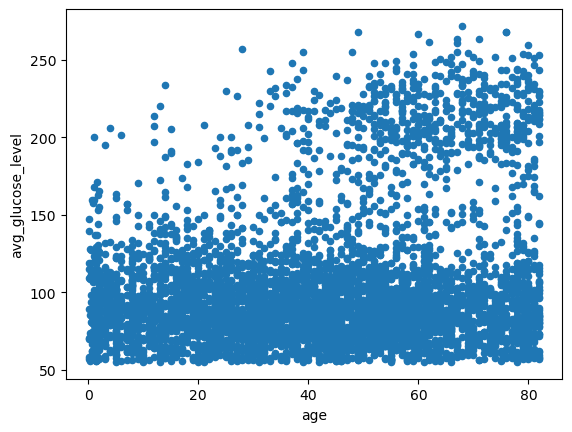

In [7]:
D1 = D1[['age', 'avg_glucose_level']]
D1.plot.scatter('age', 'avg_glucose_level')

In [8]:
k_range = range(2, 21)
for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(D1)
    km_labels = km_model.predict(D1)
    avg = silhouette_score(D1, km_labels)
    
    print((k, round(avg, 4)))


(2, 0.6558)
(3, 0.3992)
(4, 0.4099)
(5, 0.3933)
(6, 0.3695)
(7, 0.3393)
(8, 0.3477)
(9, 0.3392)
(10, 0.3375)
(11, 0.3408)
(12, 0.3441)
(13, 0.3459)
(14, 0.3385)
(15, 0.3372)
(16, 0.3288)
(17, 0.3335)
(18, 0.3322)
(19, 0.3275)
(20, 0.3342)


In [9]:
km_model = KMeans(n_clusters=2, 
                  n_init='auto', random_state=0)
km_model.fit(D1)

KMeans(n_clusters=2, n_init='auto', random_state=0)

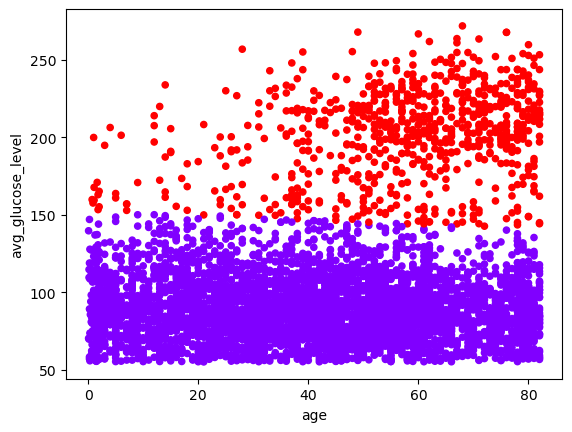

In [10]:
D1.plot.scatter('age', 'avg_glucose_level', c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### D2

<Axes: xlabel='age', ylabel='avg_glucose_level'>

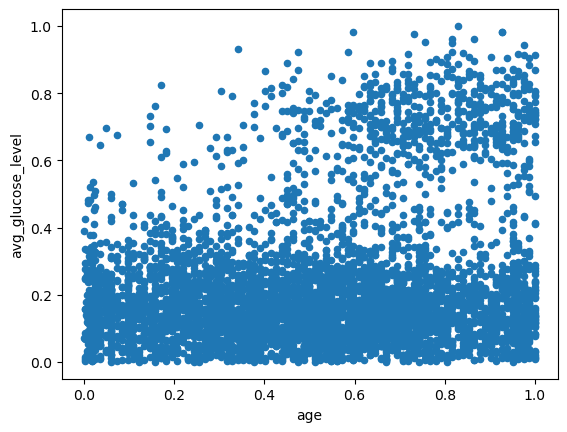

In [11]:
D2 = D2[['age', 'avg_glucose_level']]
D2.plot.scatter('age', 'avg_glucose_level')

In [12]:
k_range = range(2, 21)
for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(D2)
    km_labels = km_model.predict(D2)
    avg = silhouette_score(D2, km_labels)
    
    print((k, round(avg, 4)))

(2, 0.4297)
(3, 0.4993)
(4, 0.4366)
(5, 0.3895)
(6, 0.3921)
(7, 0.3982)
(8, 0.3532)
(9, 0.3666)
(10, 0.3637)
(11, 0.3481)
(12, 0.347)
(13, 0.3484)
(14, 0.3447)
(15, 0.3469)
(16, 0.3482)
(17, 0.3407)
(18, 0.3394)
(19, 0.3405)
(20, 0.336)


In [13]:
km_model = KMeans(n_clusters=3, 
                  n_init='auto', random_state=0)
km_model.fit(D2)

KMeans(n_clusters=3, n_init='auto', random_state=0)

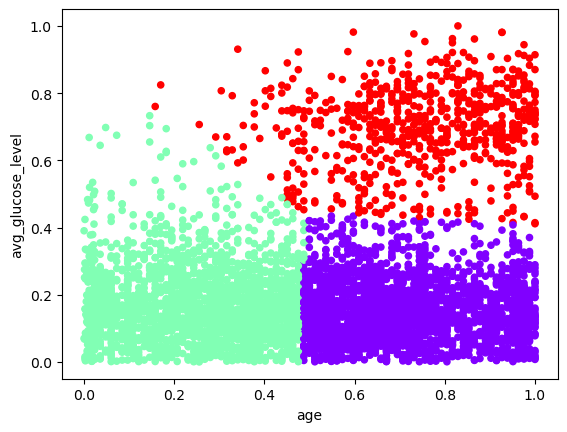

In [14]:
D2.plot.scatter('age', 'avg_glucose_level', c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### D3

<Axes: xlabel='age', ylabel='avg_glucose_level'>

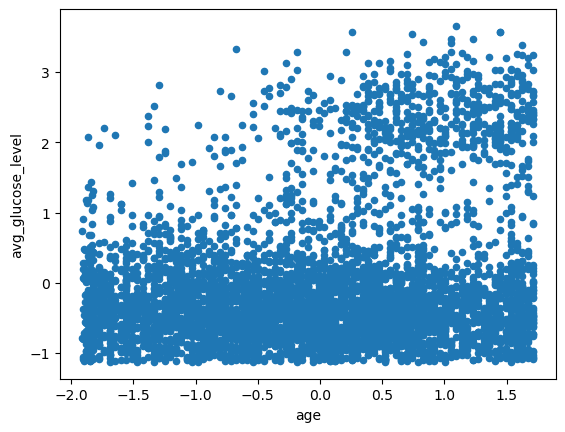

In [15]:
D3 = D3[['age', 'avg_glucose_level']]
D3.plot.scatter('age', 'avg_glucose_level')

In [16]:
k_range = range(2, 21)
for k in k_range:
    km_model = KMeans(n_clusters=k, n_init='auto', random_state=0)
    km_model.fit(D3)
    km_labels = km_model.predict(D3)
    avg = silhouette_score(D3, km_labels)
    
    print((k, round(avg, 4)))

(2, 0.3858)
(3, 0.4847)
(4, 0.4061)
(5, 0.3582)
(6, 0.3638)
(7, 0.3817)
(8, 0.3638)
(9, 0.3532)
(10, 0.3424)
(11, 0.3468)
(12, 0.3441)
(13, 0.3448)
(14, 0.3453)
(15, 0.344)
(16, 0.3427)
(17, 0.3313)
(18, 0.3343)
(19, 0.3288)
(20, 0.3386)


In [17]:
km_model = KMeans(n_clusters=3, 
                  n_init='auto', random_state=0)
km_model.fit(D3)

KMeans(n_clusters=3, n_init='auto', random_state=0)

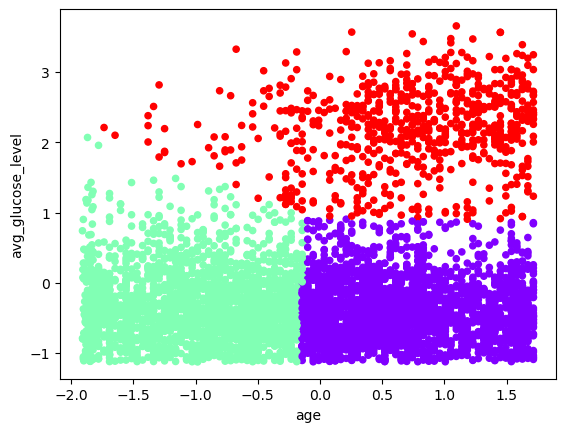

In [18]:
D3.plot.scatter('age', 'avg_glucose_level', c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()